In [1]:
%pylab inline
from mba import *
from numpy.random import random

Populating the interactive namespace from numpy and matplotlib


`cmin` and `cmax` are coordinates of the bottom-left and the top-right corners of the bounding box containing scattered data. `coo` and `val` are arrays containing coordinates and values of the data points.

In [2]:
cmin = [0.0, 0.0]
cmax = [1.0, 1.0]
coo  = random((5,2))
val  = random(coo.shape[0])

In [3]:
n = 100
s = linspace(0,1,n)
x = array(meshgrid(s,s)).transpose([1,2,0])

The `plot_surface()` function constructs MBA class with the given initial grid size, interpolates the input data over regular surface, and plots the results

In [4]:
def plot_surface(m0):
    interp = mba2(cmin, cmax, [m0,m0], coo, val)
    v = interp(x)
    pcolormesh(s, s, v)
    scatter(x=coo[:,0], y=coo[:,1], c=val)
    xlim([0,1])
    ylim([0,1])
    title("$m_0 = %s$" % m0)
    colorbar();

The smaller the initial grid size, the smoother the interpolated surface.

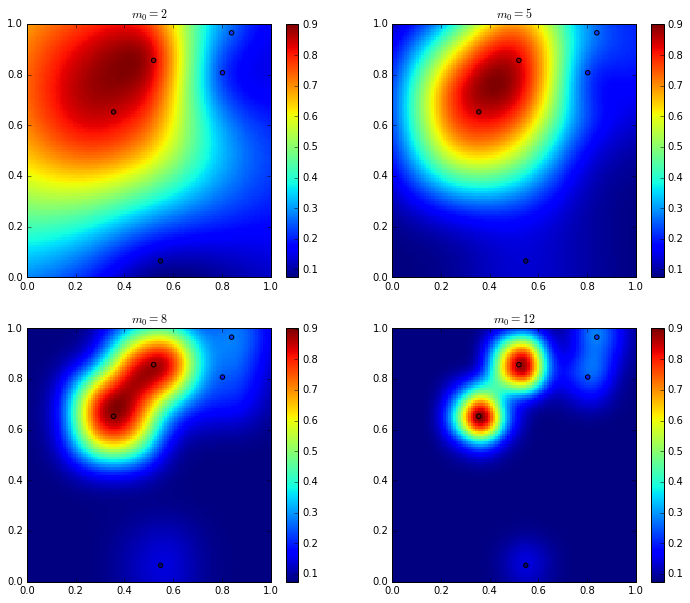

In [5]:
figure(figsize=(12,10))
subplot(221); plot_surface(2)
subplot(222); plot_surface(5)
subplot(223); plot_surface(8)
subplot(224); plot_surface(12)